In [19]:
# importing the libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

We used a diabetes dataset in a csv file to understand the workings of LIME and SHAP.

In [20]:
# import the dataset
df = pd.read_csv('diabetes(2).csv')
# viewing the first few rows
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [21]:
df['Outcome'].unique()

array([1, 0])

In this dataset, there are mainly two types of outcomes or classes, which are:
* '1': "Has diabetes"
* '0': "No diabetes"

# Preprocessing the dataset

In [22]:
# checking the dimensions of the dataframe
df.shape

(768, 9)

In [23]:
# checking for missing values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [24]:
# checking for encoding categorical features
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

As we can see, the data has columns with no missing values, and all of them are numerical data. We will move further to split the data into train and test sets. 

# Model Training

In [25]:
# splitting the data into independent and dependent variables
x = df.drop(columns=['Outcome'])
y = df['Outcome']

# dividing the dataset into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [26]:
# building the model
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42)

In [27]:
# importing the necessary libraries
from sklearn.model_selection import GridSearchCV

# creating a dictionary and list of their values to optimize the model
params = {
    'n_estimators' : [100, 500, 1000],
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [3, 4, 5, 6, 7, 8, 9, 10],
}

# intiating a grid search to find the most optimum parameters
grid_search = GridSearchCV(model, params, cv=5)

# fitting the training data
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
                         'n_estimators': [100, 500, 1000]})

In [28]:
# obtaining the best model
model = grid_search.best_estimator_

# fitting the training data
model.fit(x_train, y_train)

# obtaining the classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, model.predict(x_test)))

              precision    recall  f1-score   support

           0       0.81      0.80      0.81       123
           1       0.66      0.67      0.66        69

    accuracy                           0.76       192
   macro avg       0.73      0.74      0.74       192
weighted avg       0.76      0.76      0.76       192



The model score shows 74% accuracy.

# LIME (Local Interplretable Model-agnostic Explanations)

In [29]:
# importing lime
import lime
from lime import lime_tabular

Now we will use the LIME that requires,
* **training data** that should be in a numpy array.
* **feature_names** are training data columns
* **class_names** are target variables, and
* **mode**, which is classification in our case. 

In [30]:
# creating an instance of the lime tabular explainer
lime_explainer = lime_tabular.LimeTabularExplainer(training_data=np.array(x_train), feature_names=x_train.columns, 
            class_names=['No Diabetes', 'Has Diabetes'], mode='classification')

In [31]:
# obtaining the explanation
explanation = lime_explainer.explain_instance(data_row=x_test.iloc[1], predict_fn=model.predict_proba, num_features=8)
# printing out the explanation
explanation.show_in_notebook(show_table = True, show_all = False)

c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\lime\discretize.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\lime\discretize.py:110: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\lime\lime_tabular.py:544: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treate

LIME identified the most contributing features for the given observation and arranged them in descending order of the magnitude of the feature contributions.

The features marked in blue indicate they contribute towards decreasing the model’s predicted values, while the features marked in orange indicate they contribute towards increasing the predicted values for the observation.

Also, LIME went further by providing the feature-level conditional rules utilized by the model for splitting the data for the observation

In [32]:
# obtaining the explanation
explanation = lime_explainer.explain_instance(data_row=x_test.iloc[0], predict_fn=model.predict_proba, num_features=8)
# printing out the explanation
explanation.show_in_notebook(show_table = True, show_all = False)

c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\lime\discretize.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\lime\discretize.py:110: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\lime\lime_tabular.py:544: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treate

# SHapley Additive ExPlanations(SHAP)


In [33]:
# importing shap
import shap

In [34]:
# instantiating a TreeExplainer object
explainer = shap.TreeExplainer(model)

In [35]:
# obtaining shapely values of the data
shap_values = explainer.shap_values(x)
shap.initjs()

To understand the effect of a single feature, we will see the dependence plot.

AssertionError: 'shap_values' and 'features' values must have the same number of rows!

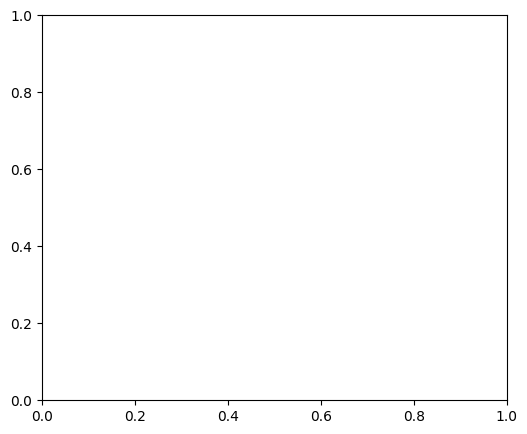

In [ ]:
# plotting the dependence of shapely values on BMI 
#shap.dependence_plot('BMI', shap_values[0], x, interaction_index="BMI")

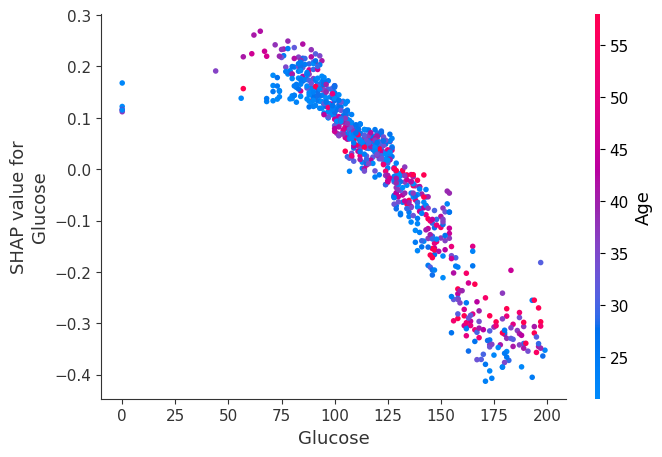

In [ ]:
# plotting the dependence of shapely values on Glucose
shap.dependence_plot('Glucose', shap_values[0], x)

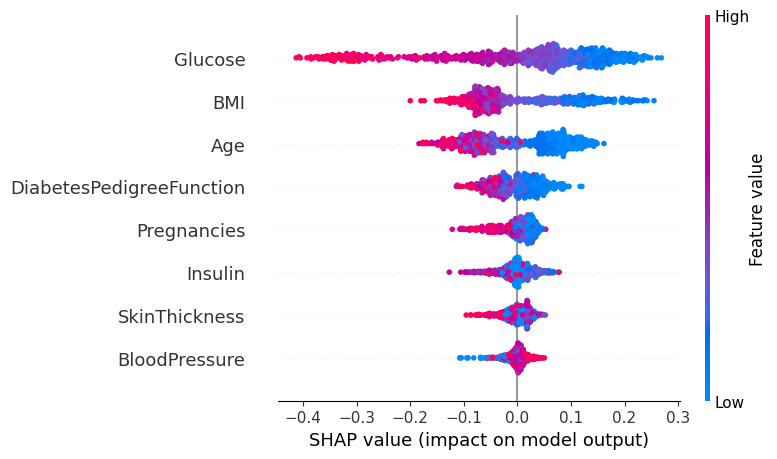

In [ ]:
# plotting the dependence of shapely values on all the features
shap.summary_plot(shap_values[0], x)

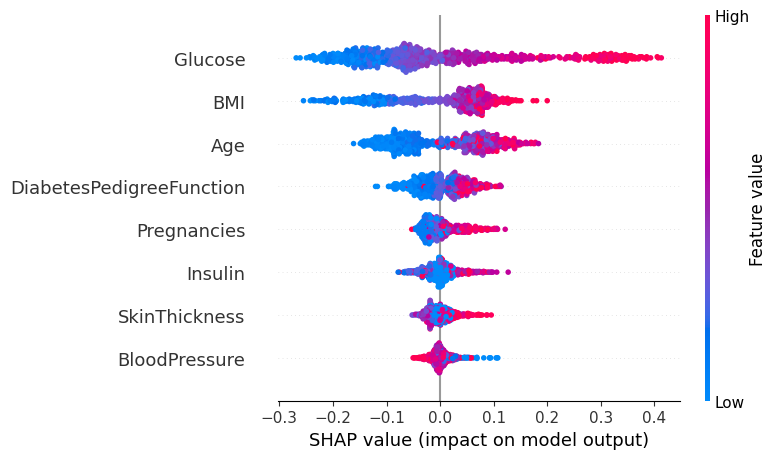

In [ ]:
shap.summary_plot(shap_values[1], x)

Variable Importance Plot - Global Interpretation


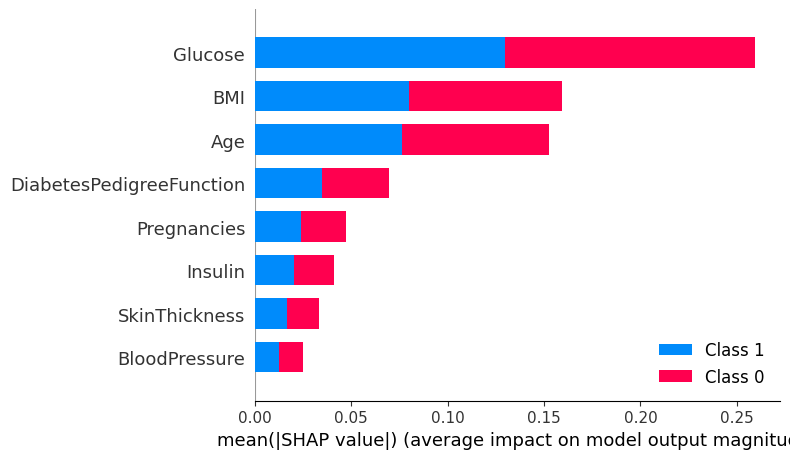

In [ ]:
print("Variable Importance Plot - Global Interpretation")
figure = plt.figure()
shap.summary_plot(shap_values, x)

This output provides a global interpretation of the model's behavior on the diabetes dataset using SHAP summary plots. Features with longer bars are more important for the model's predictions.
Here Feature Rankings are:
* **Glucose**: The most important feature influencing predictions. High glucose levels likely increase the probability of diabetes (Class 1), while low levels decrease it.
* **BMI** and **Age**: Also critical factors, where higher values are associated with higher diabetes risk.
* Less impactful features include **SkinThickness** and **BloodPressure**.
